## Exercise 1:

Show that the Expected Shortfall of a continuous random variable X:
$$ ES_\alpha(X) \equiv E(-X|X\leq -VaR_\alpha(X)) = -\frac{1}{\alpha}\int _{-\infty}^{-VaR_\alpha(X)}xp(x)dx $$

where $VaR_\alpha(X)$ is the Value at Risk defined as:

$$Pr(X\leq -VaR_\alpha(X)) = \int_{-\infty}^{-VaR\alpha(X)}p(x)dx = \alpha$$

$\alpha \in (0,1)$ can be alternatively calculated as:

$$ES_\alpha(X) = \frac{1}{\alpha} \int_0^{\alpha}VaR_\gamma(X)d\gamma$$

### Solution:
(we asume here that p(x) is not a heavy-tail distribution, therefore its CDF exists)

We take a partial derivative on both sides of the definition of $VaR_\alpha$


$$ \frac{\partial}{\partial \alpha}  \int_{-\infty}^{-VaR\alpha(X)}p(x)dx =  \frac{\partial}{\partial\alpha} \alpha$$

$$  \frac{\partial (-VaR_\alpha(X))}{\partial \alpha} \frac{\partial }{\partial (-VaR_\alpha(X))} \int_{-\infty}^{-VaR\alpha(X)}p(x)dx
= 1$$

$$  \frac{\partial (-VaR_\alpha(X))}{\partial \alpha}\cdot p(-VaR_\alpha(X) )
= 1$$

We want to prove that:

$$ -\int_{-\infty}^{-VaR_\alpha(X)}xp(x)dx = \int_0^{\alpha}VaR_\gamma(X) d\gamma $$

We take a partial derivative of $\alpha$ on both sides of the above:
LHS:

$$ -\frac{\partial (-VaR_\alpha(X))}{\partial \alpha} \frac{\partial }{\partial (-VaR_\alpha(X))} \int_{-\infty}^{-VaR\alpha(X)}x \cdot p(x)dx 
= -\frac{\partial(-VaR_\alpha(X))}{\partial\alpha}p(-VaR_\alpha(X))\cdot (-VaR_\alpha(X)) 
=VaR_\alpha(X)$$


RHS:

$$ \frac{\partial}{\partial\alpha} \int_0^\alpha VaR_\gamma(X)d\gamma = VaR\alpha(X)$$

So LHS and RHS, up to a constant, are equal.

To prove that LHS and RHS are equal, we check its behaviour for $\alpha\rightarrow 0$:

$$\lim_{\alpha\rightarrow 0}\int_{-\infty}^{-VaR_\alpha(X)} p(x)dx = \alpha \rightarrow 0 $$

$$\lim_{\alpha \rightarrow 0} \int_{0}^\alpha  VaR_\gamma(X)d\gamma \rightarrow 0  $$


Moreover,

$$ \lim_{VaR_\alpha \rightarrow \infty} \int_{-\infty}^{-VaR_\alpha(X)} x\cdot p(x)dx \rightarrow 0$$

So for $\alpha \rightarrow 0$ implies $VaR_\alpha(X)\rightarrow \infty$ and vice versa ()

## Exercise 4:


Data  file datSt.txt contains a sample  of 1000 daily share  prices S(t) generated  for some geometric Brownian  motion process (log  rates  of return:
$$ R(t)  =   ln \left[ \frac{S(t)}{S(0)}  \right] $$
are normally distributed).

* Based  on  this  empirical  data  compute: (annualized) historical Volatility: $\sigma \sqrt{T}= \sqrt{250}·sd$ (sd-  standard  deviation  of  dailylog rates of return and we assume a year $T$ has 250 business days) and (annualized) mean return $\mu T = 250 <...>$ (where $<...>$ is the meandaily log rate of return)


* Based on results of point (a) and Exercise 3 (i.e. using the Gaussian approximation (2)) compute daily $VaR_\alpha(\Delta S)$  and  $ES_\alpha(\Delta S)$ for $\alpha= 0.01,0.05,0.10,0.20$. Assume you invest PLN 10 mln in the shares.


* Based on results of point (a) and Exercise 3 (i.e.  using the Gaussian approximation (2)) compute weekly $VaR_\alpha(\Delta S)$  and  $ES_\alpha(\Delta S)$ for $\alpha= 0.01,0.05,0.10,0.20$. Assume you invest PLN 10 mln in the shares.


* Based on the empirical data compute daily $VaR_\alpha(\Delta S)$ and $ES_\alpha(\Delta S)$ for $\alpha = 0.01,0.05,0.10,0.20$. Assume you invest PLN 10 mln in the shares 

##### Note:  compute empirical CDF:ˆP≤(x) =#sample elements≤xn(n-sample size) and then empiricalV aRα(X) =−inf{x:P≤(x)> α}and empiricalESα(X) (use formula (1))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white", color_codes=True)
sns.set(style="darkgrid")

from copy import copy

PI = np.pi

%matplotlib inline

In [2]:
data = pd.read_csv('dat_St.csv', sep=' ', names = ['S(t)'])

R_t = [0]
Delta_S = [0]

for i in range(1, len(data)):
    R_t.append(np.log(data['S(t)'][i] / data['S(t)'][i-1]))
    Delta_S.append(data['S(t)'][i] - data['S(t)'][i-1])
    
data['R(t)'] = R_t
data['daily_return'] = np.exp(data['R(t)']) -1
data['Delta_S'] = Delta_S
data['day']=list( range(len(data)))

data

,S(t),R(t),daily_return,Delta_S,day
0,100.00,0.000000,0.000000,0.00,0
1,101.30,0.012916,0.013000,1.30,1
2,103.05,0.017128,0.017275,1.75,2
3,103.78,0.007059,0.007084,0.73,3
4,102.72,-0.010266,-0.010214,-1.06,4
...,...,...,...,...,...
996,158.47,0.003793,0.003801,0.60,996
997,159.29,0.005161,0.005174,0.82,997
998,157.96,-0.008385,-0.008350,-1.33,998
999,157.10,-0.005459,-0.005444,-0.86,999


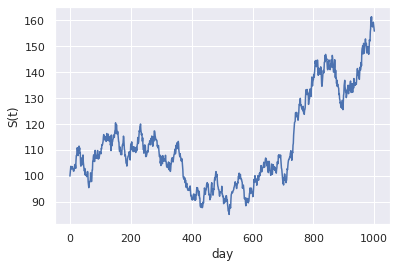

In [3]:
sns.lineplot( x='day', y='S(t)', data=data)

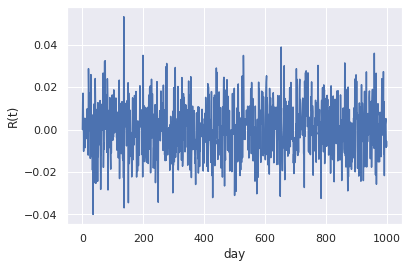

In [4]:
sns.lineplot( x='day', y='R(t)', data=data)

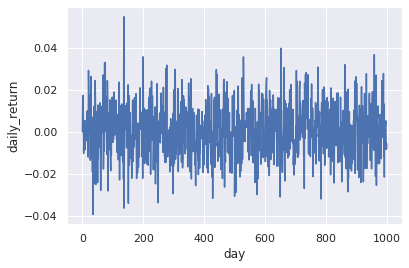

In [5]:
sns.lineplot( x='day', y='daily_return', data=data)

## a)

In [6]:
T = 250
volatility = np.sqrt(T) * data['R(t)'].std()
mean_return = T*data['R(t)'].mean()

print("Volatility: {:} \t mean return: {:}".format(volatility, mean_return) )

Volatility: 0.20165657013423272 	 mean return: 0.11083615944738355


## b)

from (3a) we have the following relation:

$$VaR_\alpha =  -S_0 \cdot \mu\cdot t + \sqrt{2t}S_0\sigma\cdot InverseErcf(2\alpha)$$

$$ES = -S_0t\mu + \frac{e^{-InverseErcf(-1+2\alpha)^2}S_0\sqrt{t}\sigma}{ \sqrt{2\pi}\alpha}$$

where $S_0 = S(0)$

In [7]:
from scipy.special import erfinv

def get_approximate_VaRa(S0, mu, sigma, t, alpha, n):
    return (-S0*mu*t + np.sqrt(2*t)*S0 * sigma * erfinv(1-2*alpha))*n


def get_approximate_ES(S0, mu, sigma, t, alpha, n):
    return (-S0*mu*t + np.exp(-erfinv(-1+2*alpha)**2)*S0*np.sqrt(t)*sigma /(np.sqrt(2*PI)*alpha))*n   

In [8]:
n = 10*10**6 ## investment

S0 = 1  #data['S(t)'][0]
sigma = volatility 
mu = mean_return

t = 1/250;
alpha = 0.01
VaRa = get_approximate_VaRa(S0, mu, sigma, t, alpha, n)
ES_a = get_approximate_ES(S0, mu, sigma, t, alpha, n)

print(u'\u03B1 = {:}: VaR: {:} PLN \t mean return: {:} PLN'.format(alpha, int(VaRa), int(ES_a)) )

alpha = 0.05
VaRa = get_approximate_VaRa(S0, mu, sigma, t, alpha, n)
ES_a = get_approximate_ES(S0, mu, sigma, t, alpha, n)
print(u'\u03B1 = {:}: VaR: {:} PLN \t mean return: {:} PLN'.format(alpha, int(VaRa), int(ES_a)) )

alpha = 0.1
VaRa = get_approximate_VaRa(S0, mu, sigma, t, alpha, n)
ES_a = get_approximate_ES(S0, mu, sigma, t, alpha, n)
print(u'\u03B1 = {:}: VaR: {:} PLN \t mean return: {:} PLN'.format(alpha, int(VaRa), int(ES_a)) )

alpha = 0.2
VaRa = get_approximate_VaRa(S0, mu, sigma, t, alpha, n)
ES_a = get_approximate_ES(S0, mu, sigma, t, alpha, n)
print(u'\u03B1 = {:}: VaR: {:} PLN \t mean return: {:} PLN'.format(alpha, int(VaRa), int(ES_a)) )


α = 0.01: VaR: 292266 PLN 	 mean return: 335484 PLN
α = 0.05: VaR: 205349 PLN 	 mean return: 258642 PLN
α = 0.1: VaR: 159014 PLN 	 mean return: 219395 PLN
α = 0.2: VaR: 102905 PLN 	 mean return: 174096 PLN


## c)

In [9]:
t = 1/52;

alpha = 0.01
VaRa = -S0*mu*t + np.sqrt(2*t)*S0 * sigma * erfinv(1-2*alpha)
ES_a = -S0*mu*t + np.exp(-erfinv(-1+2*alpha)**2)*S0*np.sqrt(t)*sigma /(np.sqrt(2*PI)*alpha)
print(u'\u03B1 = {:}: VaR: {:} PLN \t mean return: {:} PLN'.format(alpha, int(VaRa*n), int(ES_a*n)) )

alpha = 0.05
VaRa = -S0*mu*t + np.sqrt(2*t)*S0 * sigma * erfinv(1-2*alpha)
ES_a = -S0*mu*t + np.exp(-erfinv(-1+2*alpha)**2)*S0*np.sqrt(t)*sigma /(np.sqrt(2*PI)*alpha)
print(u'\u03B1 = {:}: VaR: {:} PLN \t mean return: {:} PLN'.format(alpha, int(VaRa*n), int(ES_a*n)) )

alpha = 0.1
VaRa = -S0*mu*t + np.sqrt(2*t)*S0 * sigma * erfinv(1-2*alpha)
ES_a = -S0*mu*t + np.exp(-erfinv(-1+2*alpha)**2)*S0*np.sqrt(t)*sigma /(np.sqrt(2*PI)*alpha)
print(u'\u03B1 = {:}: VaR: {:} PLN \t mean return: {:} PLN'.format(alpha, int(VaRa*n), int(ES_a*n)) )

alpha = 0.2
VaRa = -S0*mu*t + np.sqrt(2*t)*S0 * sigma * erfinv(1-2*alpha)
ES_a = -S0*mu*t + np.exp(-erfinv(-1+2*alpha)**2)*S0*np.sqrt(t)*sigma /(np.sqrt(2*PI)*alpha)
print(u'\u03B1 = {:}: VaR: {:} PLN \t mean return: {:} PLN'.format(alpha, int(VaRa*n), int(ES_a*n)) )


α = 0.01: daily volatility: 629242 PLN 	 mean return: 724005 PLN
α = 0.05: daily volatility: 438664 PLN 	 mean return: 555517 PLN
α = 0.1: daily volatility: 337067 PLN 	 mean return: 469461 PLN
α = 0.2: daily volatility: 214042 PLN 	 mean return: 370138 PLN


## d)

In [10]:
def empirical_cdf(x0, X):
    
    for i,x in enumerate(X):
        if x>x0:
            break
    
    return (i-1)/len(X)   

In [11]:
def get_VaRa(daily_return, alpha):
       
    daily_return.sort()
    CDF = []

    for s in daily_return:
        CDF.append(empirical_cdf(s, daily_return))
    
    for s, cdf in zip(daily_return, CDF):        
        if cdf>alpha: 
            return -s

$$ES_\alpha(X) = \frac{1}{\alpha} \int_0^{\alpha}VaR_\gamma(X)d\gamma$$

In [12]:
from scipy import integrate

def get_ESa(daily_return, alpha):   
    VaRa = lambda x: get_VaRa(daily_return, alpha = x )
    return 1/alpha * integrate.quad(VaRa, 0, alpha)[0]

In [19]:
daily_return= np.array(copy(data['daily_return']))

VaRa_001 = get_VaRa(daily_return, alpha = 0.01 )
VaRa_005 = get_VaRa(daily_return, alpha = 0.05 )
VaRa_010 = get_VaRa(daily_return, alpha = 0.10 )
VaRa_020 = get_VaRa(daily_return, alpha = 0.20 )

ES_001 = get_ESa(daily_return, 0.01)
ES_005 = get_ESa(daily_return, 0.05)
ES_010 = get_ESa(daily_return, 0.10)
ES_020 = get_ESa(daily_return, 0.20)


print(u'\u03B1 = 0.01\tVaRa(X) = {:} PLN\t ESa(X) = {:} PLN'.format(int(VaRa_001*n),int(ES_001*n)))
print(u'\u03B1 = 0.05\tVaRa(X) = {:} PLN\t ESa(X) = {:} PLN'.format(int(VaRa_005*n),int(ES_005*n)))
print(u'\u03B1 = 0.10\tVaRa(X) = {:} PLN\t ESa(X) = {:} PLN'.format(int(VaRa_010*n),int(ES_010*n)))
print(u'\u03B1 = 0.20\tVaRa(X) = {:} PLN\t ESa(X) = {:} PLN'.format(int(VaRa_020*n),int(ES_020*n)))

α = 0.01	VaRa(X) = 285130 PLN	 ESa(X) = 574433 PLN
α = 0.05	VaRa(X) = 195358 PLN	 ESa(X) = 505921 PLN
α = 0.10	VaRa(X) = 153650 PLN	 ESa(X) = 450938 PLN
α = 0.20	VaRa(X) = 106658 PLN	 ESa(X) = 360447 PLN


## e)


In [14]:
weekly_data = copy(data[data.index%5 ==0])
weekly_data.drop(['daily_return', 'Delta_S', 'day', 'R(t)'], axis = 1,inplace = True)

R_t = [0]
for i in range(1, len(weekly_data)):
    R_t.append(np.log(weekly_data['S(t)'][5*i] / weekly_data['S(t)'][(i-1)*5]))
    
weekly_data['R(t)'] = R_t
weekly_data['weekly_return'] = np.exp(weekly_data['R(t)']) -1
weekly_data['n'] = list( range(len(weekly_data)))

weekly_data

,S(t),R(t),weekly_return,n
0,100.00,0.000000,0.000000,0
5,103.10,0.030529,0.031000,1
10,102.71,-0.003790,-0.003783,2
15,103.41,0.006792,0.006815,3
20,105.99,0.024643,0.024949,4
...,...,...,...,...
980,149.13,-0.003548,-0.003541,196
985,152.10,0.019720,0.019916,197
990,159.31,0.046314,0.047403,198
995,157.87,-0.009080,-0.009039,199


In [18]:
weekly_return= np.array(copy(weekly_data['weekly_return']))

VaRa_001 = get_VaRa(weekly_return, alpha = 0.01 )
VaRa_005 = get_VaRa(weekly_return, alpha = 0.05 )
VaRa_010 = get_VaRa(weekly_return, alpha = 0.10 )
VaRa_020 = get_VaRa(weekly_return, alpha = 0.20 )

ES_001 = get_ESa(weekly_return, 0.01)
ES_005 = get_ESa(weekly_return, 0.05)
ES_010 = get_ESa(weekly_return, 0.10)
ES_020 = get_ESa(weekly_return, 0.20)

print(u'\u03B1 = 0.01\tVaRa(X) = {:} PLN\t ESa(X) = {:} PLN'.format(int(VaRa_001*n),int(ES_001*n)))
print(u'\u03B1 = 0.05\tVaRa(X) = {:} PLN\t ESa(X) = {:} PLN'.format(int(VaRa_005*n),int(ES_005*n)))
print(u'\u03B1 = 0.10\tVaRa(X) = {:} PLN\t ESa(X) = {:} PLN'.format(int(VaRa_010*n),int(ES_010*n)))
print(u'\u03B1 = 0.20\tVaRa(X) = {:} PLN\t ESa(X) = {:} PLN'.format(int(VaRa_020*n),int(ES_020*n)))

α = 0.01	VaRa(X) = 561675 PLN	 ESa(X) = 574433 PLN
α = 0.05	VaRa(X) = 441631 PLN	 ESa(X) = 505921 PLN
α = 0.10	VaRa(X) = 340065 PLN	 ESa(X) = 450938 PLN
α = 0.20	VaRa(X) = 209976 PLN	 ESa(X) = 360447 PLN


## f)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


/home/neofelia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """


Text(0.5, 1.0, 'Daily ES(α)')

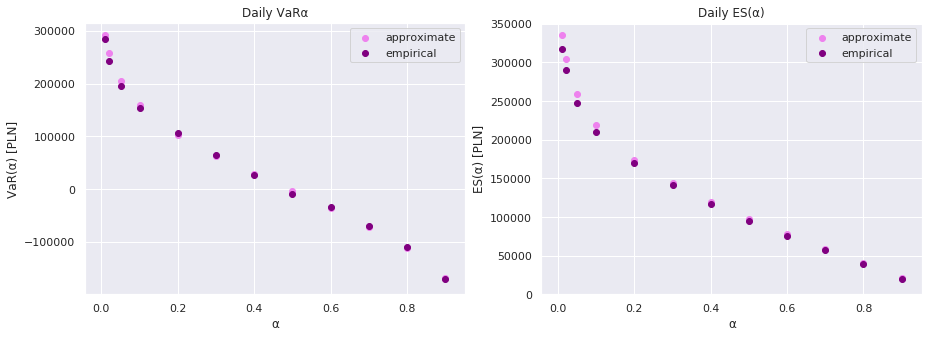

In [16]:
%time

t = 1/250;

empirical_daily_VaRa = []
approximate_daily_VaRa = []

empirical_daily_ES = []
approximate_daily_ES = []

alpha_tab = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for alpha in alpha_tab:
    approximate_daily_VaRa.append( get_approximate_VaRa(S0, mu, sigma, t, alpha, n) )
    approximate_daily_ES.append( get_approximate_ES(S0, mu, sigma, t, alpha, n) )
    
    empirical_daily_VaRa.append(get_VaRa(daily_return, alpha = alpha)*n)
    empirical_daily_ES.append(get_ESa(daily_return, alpha)*n)
        
        
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].scatter(alpha_tab, approximate_daily_VaRa, color = 'violet', label = 'approximate')
ax[0].scatter(alpha_tab, empirical_daily_VaRa, color = 'purple', label = 'empirical')

ax[0].set_xlabel(u'\u03B1')
ax[0].set_ylabel(u'VaR(\u03B1) [PLN]')
ax[0].legend()
ax[0].set_title(u'Daily VaR\u03B1')

ax[1].scatter(alpha_tab, approximate_daily_ES, color = 'violet', label = 'approximate')
ax[1].scatter(alpha_tab, empirical_daily_ES, color = 'purple', label = 'empirical')

ax[1].set_xlabel(u'\u03B1')
ax[1].set_ylabel(u'ES(\u03B1) [PLN]')
ax[1].legend()
ax[1].set_title(u'Daily ES(\u03B1)')




CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


/home/neofelia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """


Text(0.5, 1.0, 'Weekly ES(α)')

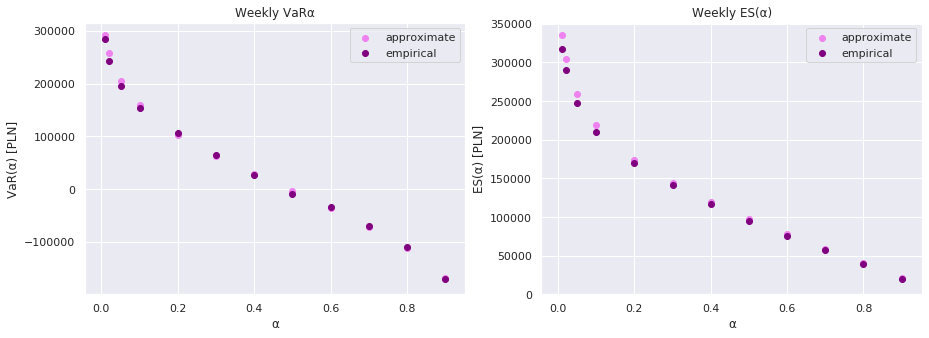

In [17]:
%time

t = 1/52;

empirical_weekly_VaRa = []
approximate_weekly_VaRa = []

empirical_weekly_ES = []
approximate_weekly_ES = []

alpha_tab = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for alpha in alpha_tab:
    approximate_weekly_VaRa.append( get_approximate_VaRa(S0, mu, sigma, t, alpha, n) )
    approximate_weekly_ES.append( get_approximate_ES(S0, mu, sigma, t, alpha, n) )
    
    empirical_weekly_VaRa.append(get_VaRa(weekly_return, alpha = alpha)*n)
    empirical_weekly_ES.append(get_ESa(weekly_return, alpha)*n)
        
        
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].scatter(alpha_tab, approximate_daily_VaRa, color = 'violet', label = 'approximate')
ax[0].scatter(alpha_tab, empirical_daily_VaRa, color = 'purple', label = 'empirical')

ax[0].set_xlabel(u'\u03B1')
ax[0].set_ylabel(u'VaR(\u03B1) [PLN]')
ax[0].legend()
ax[0].set_title(u'Weekly VaR\u03B1')

ax[1].scatter(alpha_tab, approximate_daily_ES, color = 'violet', label = 'approximate')
ax[1].scatter(alpha_tab, empirical_daily_ES, color = 'purple', label = 'empirical')

ax[1].set_xlabel(u'\u03B1')
ax[1].set_ylabel(u'ES(\u03B1) [PLN]')
ax[1].legend()
ax[1].set_title(u'Weekly ES(\u03B1)')